## YOLO Model Inference

We have the trained models present now, we can run a

In [1]:
from ultralytics import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Load your trained model
model = YOLO('./models/30.25-run/best.pt')

# Run inference
results = model('./img/bookshelf_1.jpeg')


image 1/1 /Users/kj3moraes/Projects/Coding/biblioteca/notebooks/img/bookshelf_1.jpeg: 608x800 18 books, 310.4ms
Speed: 7.1ms preprocess, 310.4ms inference, 9.7ms postprocess per image at shape (1, 3, 608, 800)


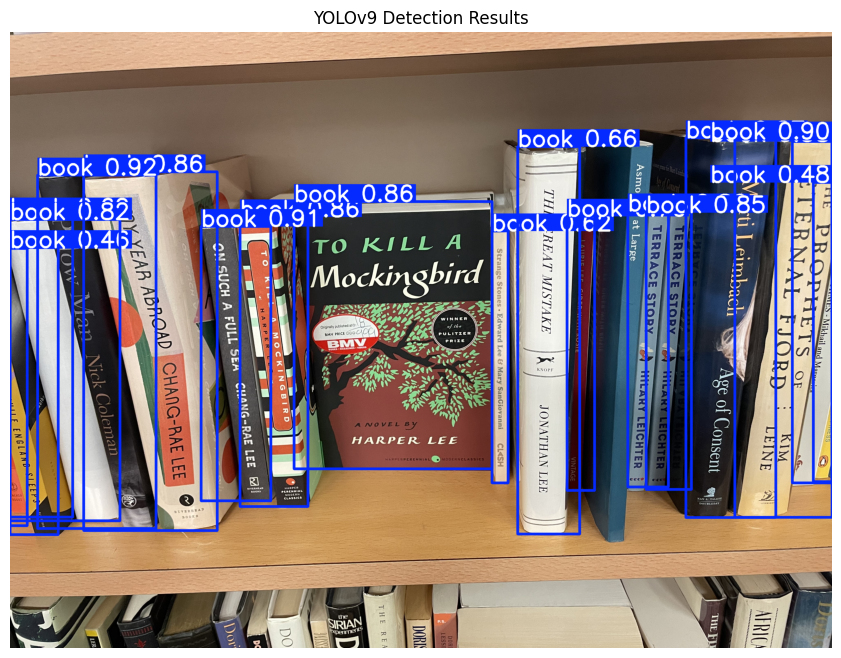

In [3]:
# Get the annotated image
annotated_image = results[0].plot()  # Returns BGR image with boxes

# Convert BGR to RGB for matplotlib
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(12, 8))
plt.imshow(annotated_image_rgb)
plt.axis('off')
plt.title('YOLOv9 Detection Results')
plt.show()